<a href="https://colab.research.google.com/github/Ashu10051998/project-on-Customer-Segementation-in-Unsupervised-ML-/blob/main/Copy_of_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.mlab as mlab
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing Data
df = pd.read_excel('/content/drive/MyDrive/Data/Online Retail.xlsx')

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
#Having a descriptive look on the dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#From the description we can see that

From the quantity section We see that 10 goods being sold on an average with a standard deviation of around 218. Also, the minimum quantity includes a negative value, this implies that the dataset also the includes returned items.

Same case with the unitprice section also.It also consists dataset of returned items with some outliars in the section.

Customer id's mean/std is of no relevance to us.

In [ ]:
df['CustomerID'].nunique()

4372

So there are 4372 different customers.

In [ ]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

So most of the data is from United kingdome.Visualizing it from a bar graph we get

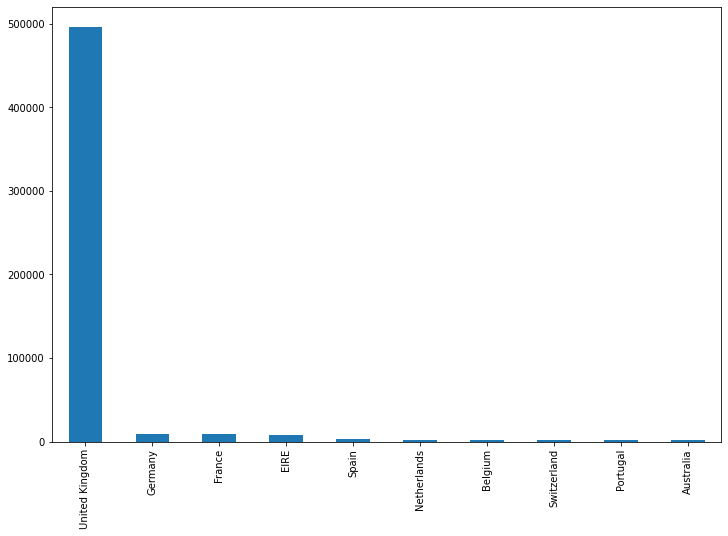

In [ ]:
df.Country.value_counts().head(10).plot.bar(figsize=(12,8))

In [ ]:
# number of unique items in stock
len(df['StockCode'].unique())

4070

In [ ]:
len(df['Description'].unique())

4224

In [ ]:
len(df['UnitPrice'].unique())

1630

Number of unique item stock codes: 4070

Number of unique item descriptions: 4224 

Number of unique item price is : 1630

Two items can have same price so mismatch of item stock codes and prices are not an issue.

But items description for each unique stock code should be different.So the number of unique item stock codes and unique item description should be same.But this is not true in our case.So we have to investigate it a bit.

In [ ]:
#Find out the stock units that have more than one description
dfStockdesc = df.groupby(["StockCode","Description"]).count().reset_index()
dfStockdesc.head(5)

,StockCode,Description,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,10002,INFLATABLE POLITICAL GLOBE,71,71,71,71,49,71
1,10080,GROOVY CACTUS INFLATABLE,22,22,22,22,21,22
2,10080,check,1,1,1,1,0,1
3,10120,DOGGY RUBBER,30,30,30,30,30,30
4,10125,MINI FUNKY DESIGN TAPES,94,94,94,94,64,94


In [ ]:
df_analyze=dfStockdesc.StockCode.value_counts()[dfStockdesc.StockCode.value_counts()>1].reset_index()

In [ ]:
df_analyze

,index,StockCode
0,20713,8
1,23084,7
2,85175,6
3,21830,6
4,72807A,5
...,...,...
645,22458,2
646,21843,2
647,37471,2
648,17136A,2


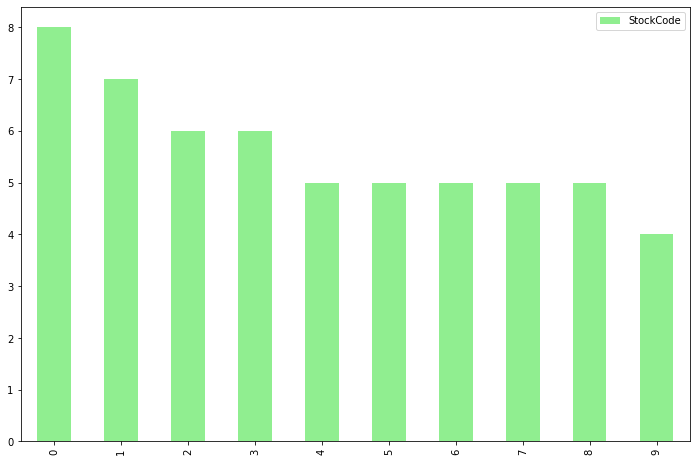

In [ ]:
df_analyze.head(10).plot.bar(figsize=(12,8),color ='lightgreen')

In [ ]:
df_analyze.head()

,index,StockCode
0,20713,8
1,23084,7
2,21830,6
3,85175,6
4,21181,5


In [ ]:
#analyzing different description .
df[df['StockCode'] ==  dfStockdesc.StockCode.value_counts()[dfStockdesc.StockCode.value_counts()>1].reset_index()['index'][6]]['Description'].unique()

array(['MISTLETOE HEART WREATH CREAM', 'MISELTOE HEART WREATH WHITE',
       'MISELTOE HEART WREATH CREAM', '?', 'had been put aside', nan],
      dtype=object)

So,there are different description due to typing error.It can be true since they are typed by humans,so there is always a chance of error.

In [ ]:
df["Amount"] = df["Quantity"] * df["UnitPrice"]
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df_customer_history = df['CustomerID'].value_counts()
df_customer_history

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
13391.0       1
16579.0       1
13366.0       1
17763.0       1
17846.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [ ]:
#Calculating the Customers frequency
dfCustomerFrequency = df[['CustomerID', 'Amount']].groupby('CustomerID').count().reset_index()
dfCustomerFrequency.head(10)

,CustomerID,Amount
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
5,12352.0,95
6,12353.0,4
7,12354.0,58
8,12355.0,13
9,12356.0,59


In [ ]:
dfCustomerHistory = df.groupby("CustomerID")['Amount'].sum().reset_index()

In [ ]:
dfCustomerHistory

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [ ]:
new_df= pd.merge(dfCustomerFrequency,dfCustomerHistory,on='CustomerID',how='outer')

In [ ]:
new_df

,CustomerID,Frequency,Amount
0,12346.0,2,0.00
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40
...,...,...,...
4367,18280.0,10,180.60
4368,18281.0,7,80.82
4369,18282.0,13,176.60
4370,18283.0,756,2094.88


The customer with customerID = 12346 ,have total amount spent =0,which is unusual as no item can have value price '0',so lets see his transaction history

In [ ]:
df[df['CustomerID']==12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


So the customer with customerID 12346 has purcahged an item and then returned it,that's why his total amount spent is 0.

Now,the range of "Amount column" in our new_df is very large.So we will use log transformstion for better visualization

We will also apply log transformation on "frequency" column for better visualization.

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'log of Amount')

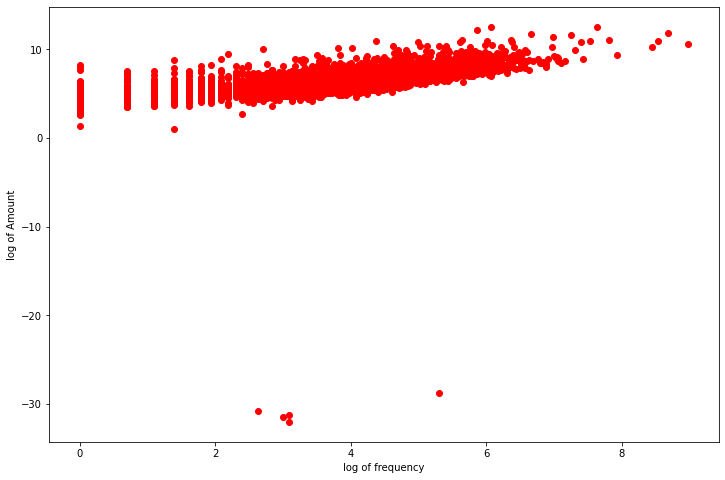

In [63]:
#Visualization in 2d
plt.figure(figsize=(12,8))
plt.scatter(np.log(new_df['Frequency']),np.log(new_df['Amount']),color='red')
plt.xlabel('log of frequency')
plt.ylabel('log of Amount')

In [ ]:
#Clustering the data 

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(new_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(new_df)
    silhouette_avg = silhouette_score(new_df, cluster_labels)
    cluster_centers.update({n_clusters :{ 'cluster_center':clusterer.cluster_centers_, 'silhouette_score':silhouette_avg,'labels':cluster_labels}})




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f67921ffb90>,
                 k=None, metric=None, model=None, timings=True)

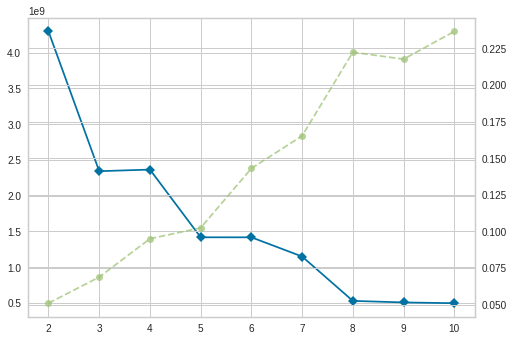

In [68]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KElbowVisualizer(KMeans(), k=10)
model.fit(new_df)

The graph gives us the number of cluster as 8

In [69]:
kmeans=KMeans(n_clusters=8)
kmeans.fit(new_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [70]:
labels=kmeans.predict(new_df)
centroids=kmeans.cluster_centers_

In [ ]:
#Ignore this cell
fig=plt.figure(figsize=(15,10))
colors=map(lambda x :colmap[x+1],labels)
color1=list(colors)
plt.scatter(new_df['Frequency'],new_df['Amount'],color=color1,alpha=0.5,edgecolors=8)
centroids=kmeans.cluster_centers_

for idx, centroid in enumerate(centroids):
  plt.scatter(*centroid,color=colmap[idx+1])

In [83]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(new_df)
y_kmeans = kmeans.predict(new_df)

In [82]:

#Ignore this cell
plt.scatter(new_df['Frequency'], new_df['Amount'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

for idx,centroid in enumerate

SyntaxError: ignored

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


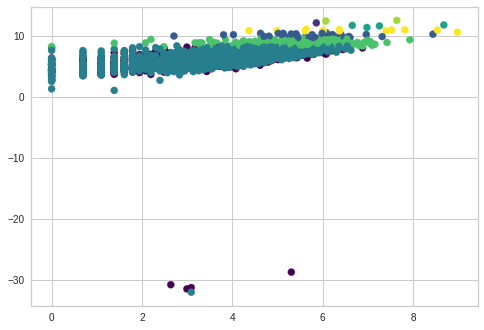

In [85]:
labels = KMeans(8, random_state=0).fit_predict(new_df)
plt.scatter(np.log(new_df['Frequency']), np.log(new_df['Amount']), c=labels,
            s=50, cmap='viridis')

In [87]:
from sklearn.preprocessing import StandardScaler